# Question 4

A coin was flipped 1000 times, and 550 times it showed up heads. Do you think the coin is biased? Why or why not?


Let $X$ be the random number of outcomes of a repeated coin toss with $1000$ flips. Then $X$ is a random variable with a Binomial distribution $X \sim \text{B}(1000; \theta)$ where $\theta$ is the probability of $\text{Heads}$ in a single coin toss. Then the probability mass function (pmf) of $X$ is

\begin{align*}
    p(X = k) = \binom{N}{k} \theta^{k} (1-\theta)^{(N-k)}
\end{align*}

If the parameter $\theta$ is unknown, we can place a prior distribution $p(\theta)$ over its value and use the Bayes' theorem to infer the distribution of $\theta$ after we observe an outcome $k$ such that

\begin{align*}
    p(\theta|X=k) = \frac{p(X=k|\theta) p(\theta)}{ \int_{0}^{1} p(X=k|\theta) p(\theta) d\theta } 
\end{align*}

A suitable choice for the prior distribution $p(\theta)$ where $0 \leq \theta \leq 1$ is the Beta distribution $\mathcal{Be}(\alpha, \beta)$ where $\alpha, \beta > 0$ are shape parameters such that

\begin{align*}
    p(\theta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1}
\end{align*}

The Beta distribution is a conjugate distribution to Binomial distribution which means that the posterior density will also be a Beta distribution.

The mean and variance of a Beta distribution is

\begin{align*}
    \mathbb{E}[\theta] = \frac{\alpha}{\alpha+\beta}
\end{align*}

\begin{align*}
    \text{Var}[\theta] = \frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}
\end{align*}

The cumulative density function (CDF) of the Beta distribution can be found as

\begin{align*}
    Pr(\Theta < \tau) = I_{\tau}(\alpha, \beta) = \int_{0}^{\tau} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} d\theta
\end{align*}

where $\Theta$ is a random variable with a Beta distribution and $0 \leq \tau \leq 1$.

The integral $I_{\tau}(\alpha, \beta)$ is known as the regularised incomplete Beta function and its implementations are available in Python.

Note that a Beta distribution with $\alpha = 1$ and $\beta = 1$ is equivalent to a uniform distribution in $(0, 1)$.

Define the inverse normalisation constant of the Beta distribution as $b(\alpha, \beta)$ such that

\begin{align*}
    b(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha+\beta)}
\end{align*}

Then the marginal distribution of the posterior density $p(\theta | X=k)$ can be found as ([Beta-Binomial Distribution](https://en.wikipedia.org/wiki/Beta-binomial_distribution))

\begin{align*}
    \int_{0}^{1} p(X=k|\theta) p(\theta) d\theta = \binom{N}{k} \frac{b(k+\alpha, N-k+\beta)}{b(\alpha, \beta)}
\end{align*}

Then the posterior can be found analytically as 

\begin{align*}
    p(\theta|X=k) &= \frac{\displaystyle \binom{N}{k} \theta^{k} (1-\theta)^{(N-k)} \frac{1}{b(\alpha, \beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} }{\displaystyle \binom{N}{k} \frac{b(k+\alpha, N-k+\beta)}{b(\alpha, \beta)} } \\
    &= \frac{1}{b(k+\alpha, N-k+\beta)} \theta^{(k+\alpha-1)} (1-\theta)^{((N-k)+\beta-1)}
\end{align*}

Hence it is a Beta distribution with updated parameters $\mathcal{Be}(k+\alpha, N-k+\beta)$.

Given that $k=550$, set $\alpha,\beta = 1$ for a uniform prior. Then, the mean and variance of the posterior distribution over $\theta$ are

\begin{align*}
    \mathbb{E}[\theta] = \frac{551}{551+451} = 0.55
\end{align*}

\begin{align*}
    \text{Var}[\theta] = \frac{551 * 451}{(551+451)^2 (551+451+1)} = 0.00025
\end{align*}

Since the mean differs from $0.5$ and the variance is small, we can confidently say that the coin is biased.

For some more details:

The probability that $\theta$ is smaller than $0.5$ is

\begin{align*}
    Pr(\theta < 0.5) = I_{0.5}(550 + 1, 450 + 1) = 0.0008
\end{align*}

Let us construct a $3$ standard deviation interval around the mean value as

\begin{align*}
    0.55 \pm 3 * \sqrt{0.00025} = (0.503, 0.597)
\end{align*}

The probability that $\theta$ lies in $(0.503, 0.597)$ can be found as

\begin{align*}
    I_{0.597}(550 + 1, 450 + 1) - I_{0.503}(550 + 1, 450 + 1) = 0.997
\end{align*}

In [19]:
import numpy as np
from scipy.special import betainc

import matplotlib.pyplot as plt

In [7]:
x = np.linspace(start=0., stop=1., num=1000)
cdf = betainc(551, 451, x)

In [23]:
betainc(551, 451, 0.597) - betainc(551, 451, 0.503)

np.float64(0.9972634166265508)

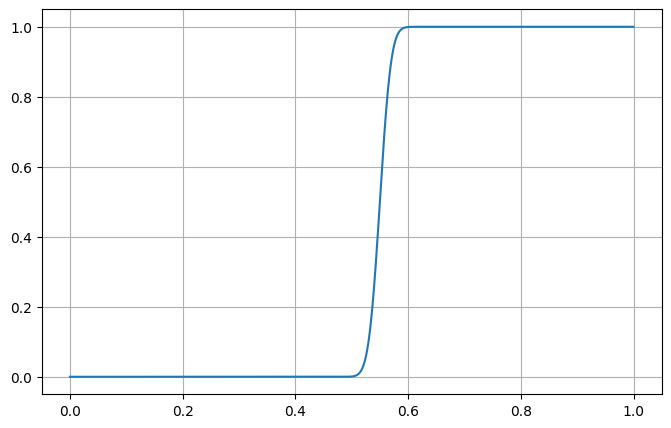

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x, cdf)
ax.grid(True)
plt.show()

In [4]:
betainc(551, 451, 0.55) - betainc(551, 451, 0.45)

np.float64(0.5016897930389186)

In [5]:
betainc(551, 451, 0.45)

np.float64(1.1814793857036516e-10)